# World Happiness Report

## Main Goals

Find which factors influence the happiness across the world the most. 
- In our EDA we explored factors that are most correlated with happiness.
- We plan to use machine learning models (regression) to predict hapiness score.
- We plan to test our model with 80-20 train test split.

## Our Data

The world hapiness index is a component of the World Happiness Report published by the UN annually using factors such as: Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, and Perceptions of corruption. Their aim is to compare countries to each other to determine why some are doing better than others.

Our data includes the socioeconomic indicators for each country and the happiness index (`Life Ladder`).

## Data Processing

Importing packages and dataset used for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data/world-happiness-report.csv')
df_2021 = pd.read_csv('data/world-happiness-report-2021.csv')
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


Renaming and keeping the columns of the dataset appropriate to our analysis

In [3]:
df.rename(columns={'Country name':'country', 'Life Ladder':'happiness_score'
                   , 'Log GDP per capita':'log_gdp','Perceptions of corruption':'corruption',
                  "Social support":"social_support", "Healthy life expectancy at birth":'life_expectancy',
                  "Freedom to make life choices":"freedom"}, inplace=True)

df = df.drop(['Positive affect','Negative affect'], axis = 1)
df

,country,year,happiness_score,log_gdp,social_support,life_expectancy,freedom,Generosity,corruption
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776
...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831


##### Check for any missing values 

In [4]:
df.isnull().sum()

country              0
year                 0
happiness_score      0
log_gdp             36
social_support      13
life_expectancy     55
freedom             32
Generosity          89
corruption         110
dtype: int64

Above is the sum of the missing values for each column
Below we have the number of rows that have a missing value for each country

In [5]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
pd.options.display.max_rows = 15
rows_with_NaN['country'].value_counts()

China                        15
Kosovo                       14
Saudi Arabia                 13
Jordan                       13
Hong Kong S.A.R. of China    11
                             ..
Oman                          1
Pakistan                      1
Poland                        1
France                        1
Maldives                      1
Name: country, Length: 71, dtype: int64

China has no corruption score for all years

In [6]:
df.loc[df['country']=='China']

,country,year,happiness_score,log_gdp,social_support,life_expectancy,freedom,Generosity,corruption
342,China,2006,4.560,8.696,0.747,66.88,NaN,NaN,NaN
343,China,2007,4.863,8.824,0.811,67.06,NaN,-0.176,NaN
344,China,2008,4.846,8.911,0.748,67.24,0.853,-0.092,NaN
345,China,2009,4.454,8.996,0.798,67.42,0.771,-0.160,NaN
346,China,2010,4.653,9.092,0.768,67.60,0.805,-0.133,NaN
347,China,2011,5.037,9.179,0.787,67.76,0.824,-0.186,NaN
348,China,2012,5.095,9.249,0.788,67.92,0.808,-0.185,NaN
349,China,2013,5.241,9.319,0.778,68.08,0.805,-0.158,NaN
350,China,2014,5.196,9.386,0.820,68.24,NaN,-0.217,NaN
351,China,2015,5.304,9.449,0.794,68.40,NaN,-0.244,NaN


We can't drop all missing rows because we would be dropping China as a whole. So we replaced all missing values with 0 since there is no data to generate an average value (or other imputation methods). 

In [7]:
# replace NA with 0
df = df.fillna(0)

In [8]:
df.isnull().sum()

country            0
year               0
happiness_score    0
log_gdp            0
social_support     0
life_expectancy    0
freedom            0
Generosity         0
corruption         0
dtype: int64

##### Check duplicate rows

In [9]:
len(df[df.duplicated()])

0

## Early Data Analysis

Initial view of happiness across the world

In [10]:
fig = px.choropleth(locations=df_2021['Country name'], locationmode="country names", color=df_2021['Ladder score'],
                    labels = {'color':'Score'},color_continuous_scale = 'Blues')
fig.update_layout(title='Happiness Index Across the World',title_x=0.5)
fig.show()

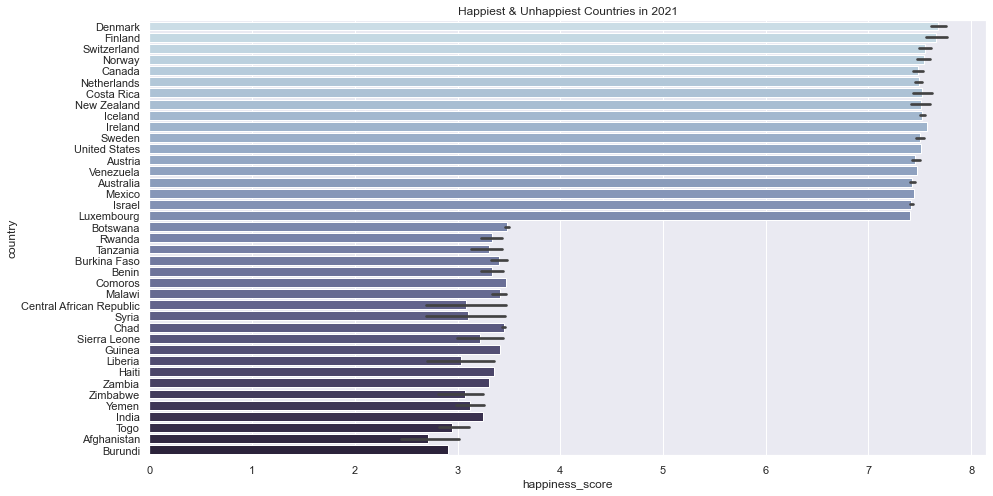

In [37]:
df_2021_happy_unhappy = df[(df.loc[:,'happiness_score']> 7.4) | (df.loc[:,'happiness_score']< 3.5)].sort_values(by='happiness_score',ascending=False)
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = 'happiness_score', y = 'country', data=df_2021_happy_unhappy,palette='ch:s=.25,rot=-.25')
plt.title('Happiest & Unhappiest Countries in 2021')
plt.show()

In [11]:
# sns.countplot(df_2021['region'])
# plt.title('Number Of Countires in Region')
# plt.ylabel('Number Of Countries')
# plt.xlabel('Region')
# plt.xticks(rotation = 90)
# plt.show()

Across the years, we are missing data from 71 countries.

In [56]:
(df[df['year'] == 2020].groupby('country')['happiness_score'].mean() - df[df['year'] == 2005].groupby('country')['happiness_score'].mean()).isna().sum()

71

Distribution of data across all countries

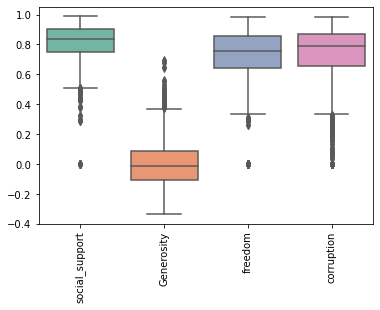

In [12]:
features = ['social_support','Generosity', 'freedom', 'corruption']
sns.boxplot(data= df.loc[:,features], orient = 'v',palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

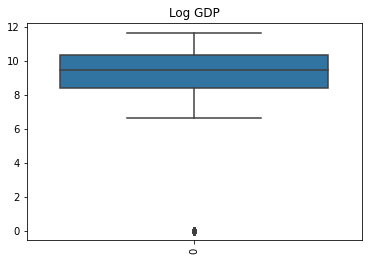

<Figure size 1440x1440 with 0 Axes>

In [13]:
sns.boxplot(data=df['log_gdp'])
plt.xticks(rotation=90)
plt.title("Log GDP")
fig=plt.figure(figsize=(20,20))
plt.show()

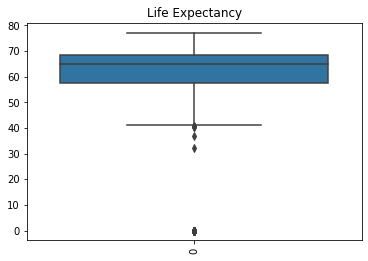

In [14]:
sns.boxplot(data=df['life_expectancy'])
plt.title("Life Expectancy")
plt.xticks(rotation=90)
plt.show()

In [15]:
len(df.country.unique())

166

In [16]:
df[df['life_expectancy'] == 0].shape[0]

55

In [17]:
df[df['log_gdp'] == 0].shape[0]

36

There are 36 years across all countries with no GDP per capita reported or no life expectancy reported, 7 countries are removed by dropping these years, leaving us with a total of 159 so we will simply drop these observations. 

In [18]:
df = df[df['log_gdp'] != 0]
df = df[df['life_expectancy'] != 0]

In [19]:
len(df.country.unique())

159

Correlations between various features

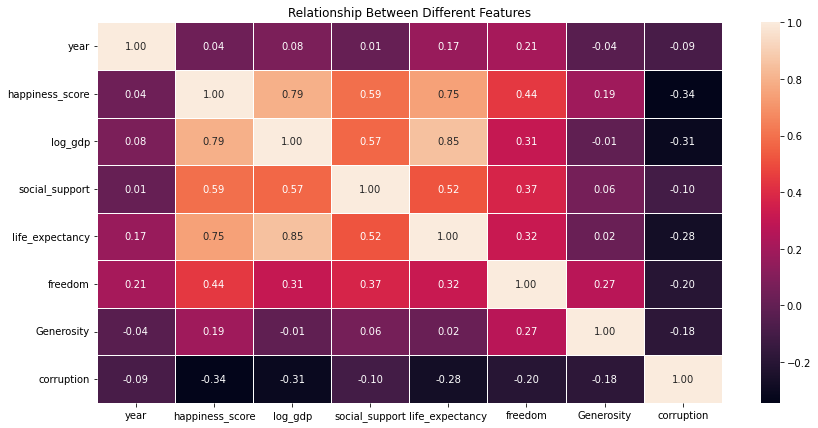

In [20]:
plt.figure(figsize = (14,7))
sns.heatmap(df.corr(), annot = True, fmt = '.2f',linewidth = 0.8)
plt.title('Relationship Between Different Features')
plt.show()

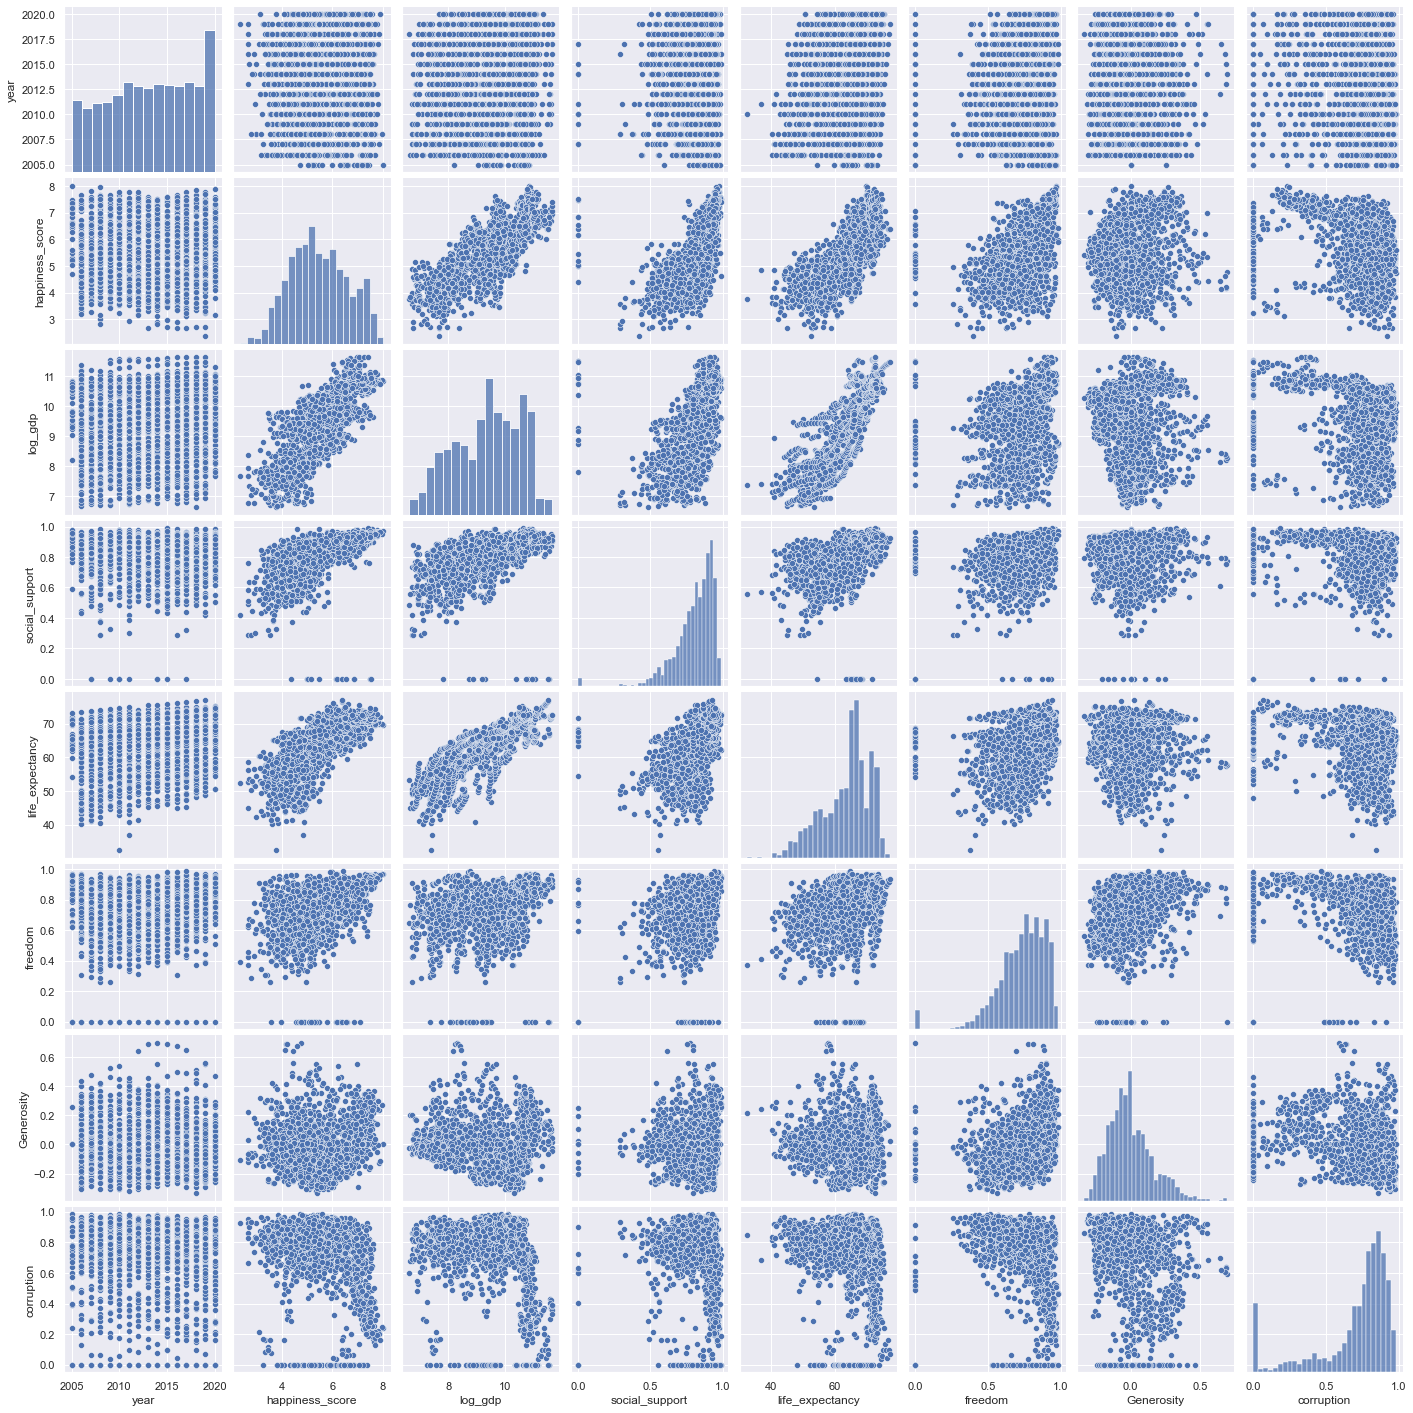

In [45]:
sns.pairplot(df)

Correlation with happiness 

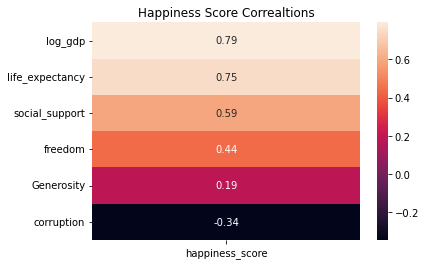

In [21]:
happiness = df.corr()['happiness_score'].to_frame().sort_values('happiness_score', ascending=False)
happiness = happiness.drop(['year', 'happiness_score'])
sns.heatmap(happiness, annot=True)
plt.title("Happiness Score Correaltions")
plt.show()

### Hypothesis

Based on our EDA, we hypothesize that social support, log GDP, freedom,, and life_expectancy have a positive correlation and corruption has a negative correlation with the happiness score of a country.

In [24]:
pop_df = df[['country', 'region', 'happiness_score',
            'social_support','life_expectancy',
            'freedom', 'Generosity']].copy()
cols=pop_df.corr()['happiness_score'].sort_values(ascending=False)
fig=plt.figure(figsize=(20,20))
plt.suptitle("Features that contribute to Happiness Score",family='Serif', weight='bold', size=20)
j=0
for i in cols.index[1:]:
    ax=plt.subplot(421+j)
    ax=sns.regplot(data=pop_df, x='happiness_score',y=i)
    ax.legend('')
    j=j+1
    
plt.legend('')

KeyError: "['region'] not in index"

### Regression Model

#### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [43]:
y = df["happiness_score"]
X = df.drop(columns={"happiness_score","country","year"})
model.fit(X, y)

LinearRegression()

In [44]:
X

,log_gdp,social_support,life_expectancy,freedom,Generosity,corruption
0,7.370,0.451,50.80,0.718,0.168,0.882
1,7.540,0.552,51.20,0.679,0.190,0.850
2,7.647,0.539,51.60,0.600,0.121,0.707
3,7.620,0.521,51.92,0.496,0.162,0.731
4,7.705,0.521,52.24,0.531,0.236,0.776
...,...,...,...,...,...,...
1944,7.984,0.768,54.40,0.733,-0.095,0.724
1945,8.016,0.754,55.00,0.753,-0.098,0.751
1946,8.049,0.775,55.60,0.763,-0.068,0.844
1947,7.950,0.759,56.20,0.632,-0.064,0.831


In [40]:
print("Intercept:", model.intercept_.round(2))
print("Slope:", model.coef_[0].round(2))

Intercept: 34.47
Slope: -0.02


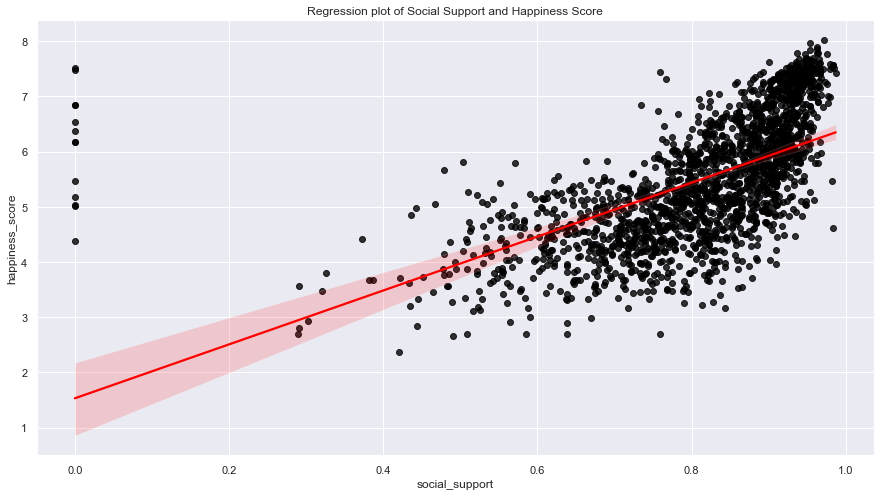

In [41]:
sns.regplot(x="social_support", y="happiness_score", data=df,line_kws={"color": "red"}, scatter_kws={"color": "black"})
plt.title("Regression plot of Social Support and Happiness Score")
plt.show()